# Object: Sheet 1 - International Visitor Arrivals By Inbound Tourism Markets

## Introduction 
In T1, we are analysing visitors' data by regions and countries

* In this part, we set different dataframes

* df1:Number of visitors after 2006

* df2:Month-on-month growth rate after 2006(didn't use)

* df3:Year-on-year growth rate after 2006

* df4:Number of visitors by year after 2006

* df5:Yearly growth rate after 2006

* Category：[1:Total (Leading Space=0);  2:Area (Leading Space=2);  3:Nation (Leading Space=4)]

## Data preparation

### Step 1: Import data, skipping the first 10 rows and using the 10th row as header

In [5]:
pip install pyecharts

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('travel_inbound.xlsx', sheet_name='T1', skiprows=10)

# Display the first few rows of the processed dataframe
df.head()
df = df.dropna(subset=['2024 May'])

### Step 2: Identify the number of leading spaces to find type of record

In [14]:
# Create a new column to identify the number of leading spaces in the 'Data Series' column
df['Leading Spaces'] = df['Data Series'].apply(lambda x: len(x) - len(x.lstrip(' ')))

def label_category(spaces):
    if spaces == 0:
        return '1'
    elif spaces == 2:
        return '2'
    elif spaces == 4:
        return '3'
    else:
        return '0'

df['Category'] = df['Leading Spaces'].apply(label_category)
df.replace('na', np.nan, inplace=True)

# Get all column names
all_columns = df.columns.tolist()

# Move the rightmost column names to the beginning
new_column_order = ['Category', 'Leading Spaces'] + [col for col in all_columns if col not in ['Category', 'Leading Spaces']]

# Reindex the dataframe with the new column order
df_reordered = df.reindex(columns=new_column_order)
# Sort the columns in chronological order
df_sorted_mid=df_reordered[df_reordered.columns[:3:-1]]
df_sorted=pd.concat([df_reordered.iloc[:, :3],df_sorted_mid],axis=1)

C:\Users\Warren\AppData\Local\Temp\ipykernel_21600\968195165.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('na', np.nan, inplace=True)


In [16]:
category_counts = df['Category'].value_counts()
category_counts

Category
3    51
2    10
1     1
Name: count, dtype: int64

* We get 51 countries, 10 regions and 1 total

In [18]:
# Assuming df_sorted is your DataFrame

# Calculate the number of missing values for each column
missing_values_count = df_sorted.isna().sum()

# Calculate the proportion of missing values for each column
missing_values_ratio = df_sorted.isna().mean()

# Create a DataFrame with missing values statistics
missing_values_summary = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Ratio': missing_values_ratio
})

# Filter columns with missing values
missing_values_summary = missing_values_summary[missing_values_summary['Missing Count'] > 0]

# Transpose the DataFrame for horizontal display
missing_values_summary = missing_values_summary.T

# Print missing values summary
missing_values_summary

,1978 Jan,1978 Feb,1978 Mar,1978 Apr,1978 May,1978 Jun,1978 Jul,1978 Aug,1978 Sep,1978 Oct,...,2005 Mar,2005 Apr,2005 May,2005 Jun,2005 Jul,2005 Aug,2005 Sep,2005 Oct,2005 Nov,2005 Dec
Missing Count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
Missing Ratio,0.387097,0.387097,0.387097,0.387097,0.387097,0.387097,0.387097,0.387097,0.387097,0.387097,...,0.241935,0.241935,0.241935,0.241935,0.241935,0.241935,0.241935,0.241935,0.241935,0.241935


* There are missing values before 2006, so we deleted the records before 2006

### Step 3: Generate df1 to df4

In [20]:
# Create the new dataframe df1 with data from 2005 onwards
columns_with_no_missing = missing_values_count[missing_values_count == 0].index
df1=df[columns_with_no_missing]

In [22]:
# Check for columns with missing values in df1
missing_values_df1 = df1.isna().sum()

# Filter columns that have missing values
missing_columns_df1 = missing_values_df1[missing_values_df1 > 0]
missing_columns_df1

Series([], dtype: int64)

In [24]:
# Create df2 for MoM growth rates without processing 'Category', 'Leading Spaces', 'Data Series'
df2 = df1.copy()
df2.iloc[:, 3:] = df2.iloc[:, 3:].apply(pd.to_numeric, errors='coerce').pct_change(axis=1) * 100

# Create df3 for YoY growth rates without processing 'Category', 'Leading Spaces', 'Data Series'
df3 = df1.copy()
df3.iloc[:, 3:] = df3.iloc[:, 3:].apply(pd.to_numeric, errors='coerce').pct_change(periods=12, axis=1) * 100

In [26]:
# Sum the data for each year
df1_yearly = df1.copy()

# Convert all columns to numeric, coercing errors to NaN
df1_yearly.iloc[:, 3:] = df1_yearly.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

# Sum data for each year
years = range(2006, 2024)
yearly_data = {}

for year in years:
    year_cols = [f'{year} {month}' for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
    valid_cols = [col for col in year_cols if col in df1_yearly.columns]
    yearly_data[year] = df1_yearly[valid_cols].sum(axis=1, skipna=True)

# Create a new dataframe with the yearly sums
df4 = pd.DataFrame(yearly_data)

# Add the 'Category', 'Leading Spaces', and 'Data Series' columns
df4 = pd.concat([df1_yearly[['Category', 'Leading Spaces', 'Data Series']], df4], axis=1)

## Overall Analysis

### Step 4: Draw bar charts to find which region and country contributes most visitors

* In this part we want to see the ranking of region and country, so we use vertical bar charts which makes it easier to compare.

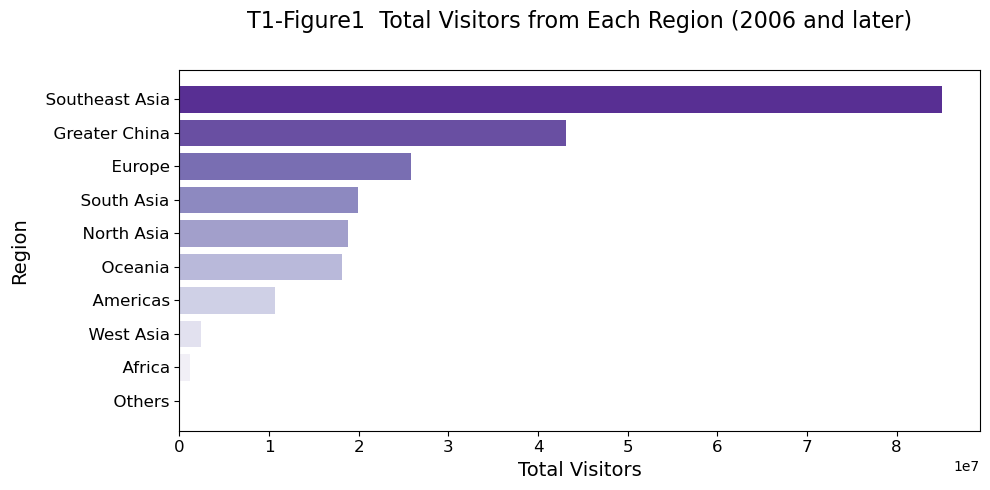

In [28]:
# Summarize data for all regions from 2006 onwards
years_to_sum = [col for col in df1.columns if col.startswith(tuple(map(str, range(2006, 2025))))]

# Convert data to numeric type and sum
total_visitors_per_region = df1[years_to_sum].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Create a new DataFrame containing regions and their total visitors
region_visitor_summary = pd.DataFrame({
    'Region': df1['Data Series'],
    'Total Visitors': total_visitors_per_region
})

# Keep only rows with category 2 (regions)
region_visitor_summary = region_visitor_summary[df1['Leading Spaces'] == 2]

# Sort by total visitors in ascending order
region_visitor_summary_sorted = region_visitor_summary.sort_values(by='Total Visitors', ascending=True)

# Create gradient colors from light purple to dark purple
colors = plt.cm.Purples(np.linspace(0.02, 0.85, len(region_visitor_summary_sorted)))

# Plot a horizontal bar chart with the gradient colors
plt.figure(figsize=(10, 5))
plt.barh(region_visitor_summary_sorted['Region'], region_visitor_summary_sorted['Total Visitors'], color=colors)
plt.title('T1-Figure1  Total Visitors from Each Region (2006 and later)', fontsize=16, pad=30)
plt.xlabel('Total Visitors', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.tick_params(axis='x', labelsize=12)  
plt.tick_params(axis='y', labelsize=12) 

plt.tight_layout()
plt.show()

#### Findings 1
* Southeast Asia has the highest number of visitors, followed by Great China, which is about half of Southeast Asia. 
* Europe ranked 3. There are fewer visitors from West Asia and Africa visiting Singapore.

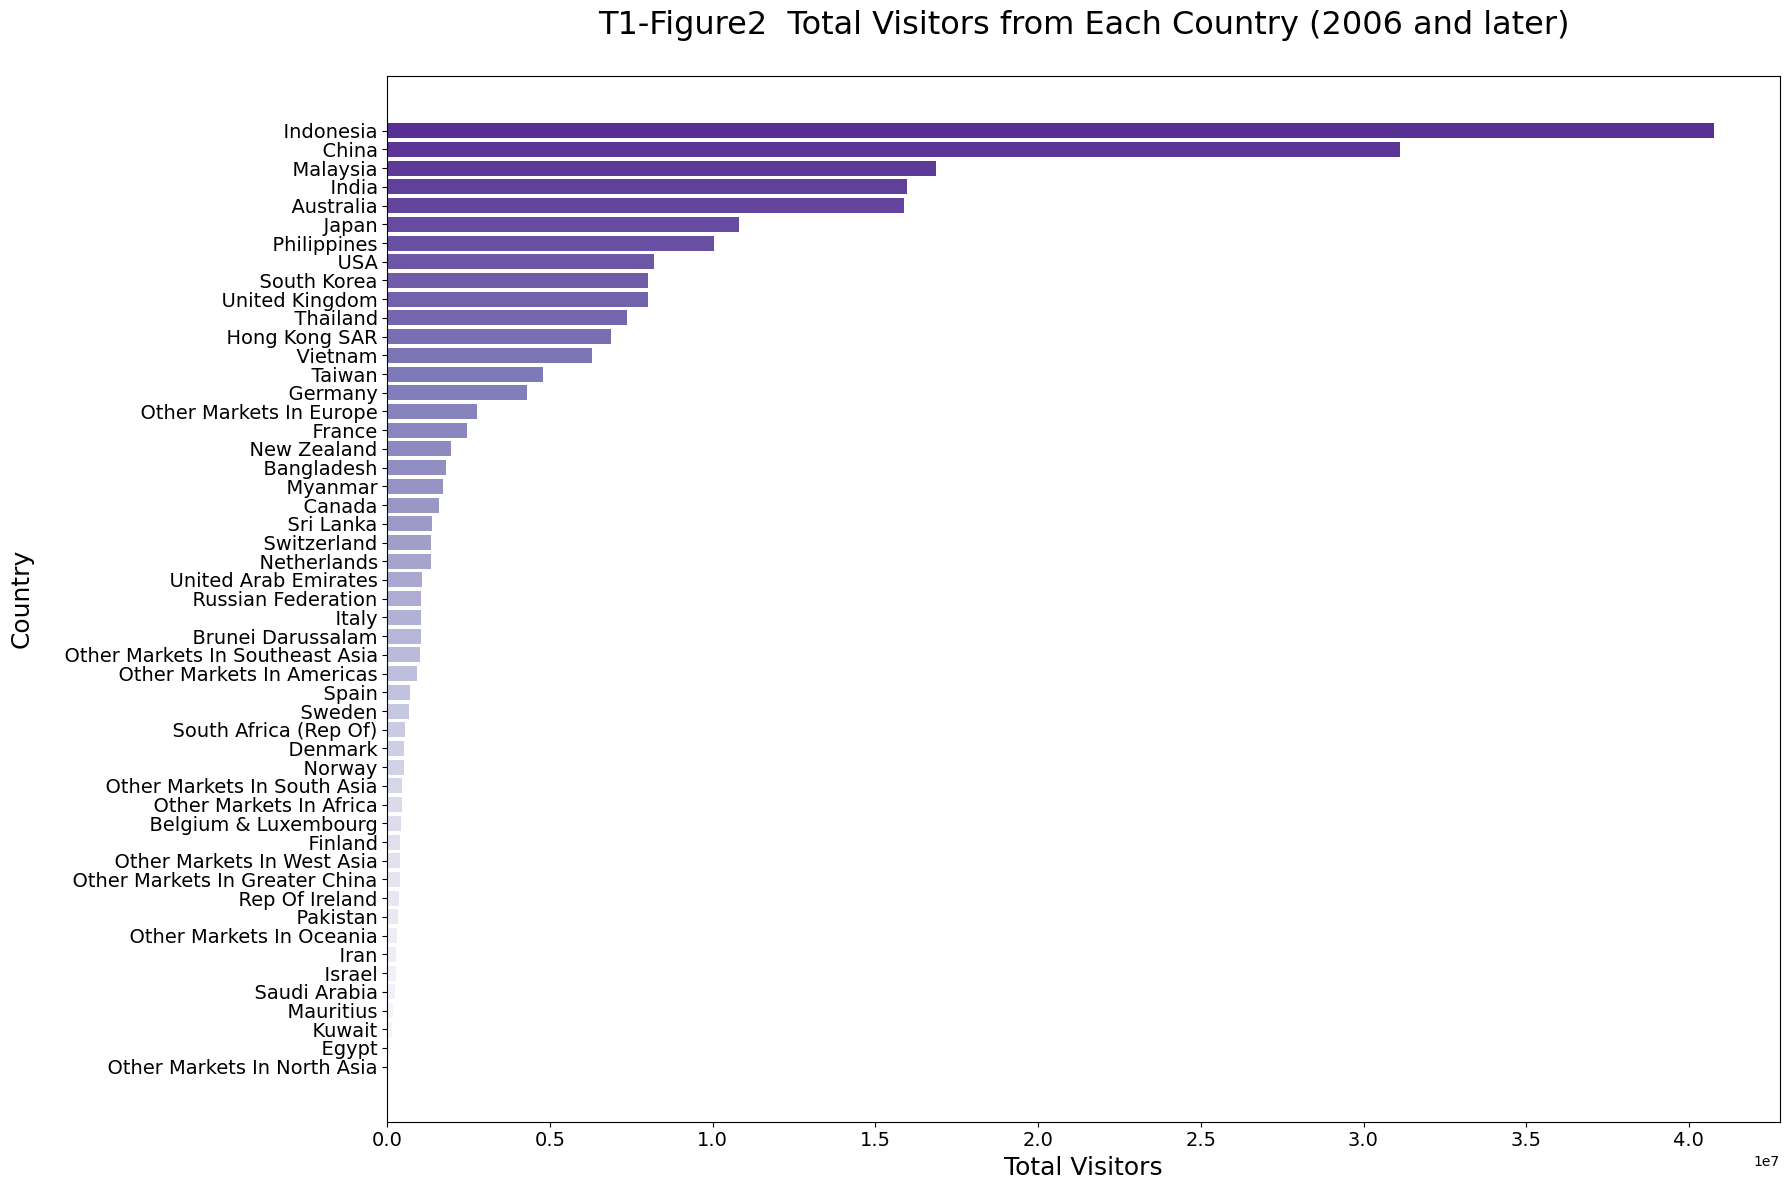

In [30]:
# Summarize data for all countries from 2006 onwards
years_to_sum = [col for col in df1.columns if col.startswith(tuple(map(str, range(2006, 2025))))]

# Convert data to numeric type and sum
df_sum = df1[years_to_sum].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Create a new DataFrame containing countries and their total visitors
df_countries_sum = pd.DataFrame({
    'Country': df1['Data Series'],
    'Total Visitors': df_sum
})

# Remove rows with category 2, keep only category 4 rows
df_countries_sum = df_countries_sum[df1['Leading Spaces'] == 4]

# Sort by total visitors in ascending order
df_countries_sum_sorted = df_countries_sum.sort_values(by='Total Visitors', ascending=True)

# Create gradient colors from light purple to dark purple
colors = plt.cm.Purples(np.linspace(0.02, 0.85, len(df_countries_sum_sorted)))


plt.figure(figsize=(18, 12))
plt.barh(df_countries_sum_sorted['Country'], df_countries_sum_sorted['Total Visitors'], color=colors)
plt.title('T1-Figure2  Total Visitors from Each Country (2006 and later)', fontsize=23, pad=30)
plt.xlabel('Total Visitors', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.tick_params(axis='x', labelsize=14)  
plt.tick_params(axis='y', labelsize=14)  


plt.tight_layout()
plt.show()

#### Findings 2
* Most visitors came from Indonesia, then from China. Malaysia, India and Australia ranked 3,4,5, having a similar number of total visitors. 
* Other major visitor-contributing countries are mainly developed countries (like the US, Japan, South Korea, and the UK) as well as countries that are geographically close to Singapore (such as the Philippines, Thailand, and Vietnam).

### Step 5: Draw world map for different years

* We aim to show the distribution of visitors from each region for each year and to visualize the locations of these countries more intuitively. Therefore, we created a world map illustrating the visitor distribution.

In [32]:
# World_map
from pyecharts.charts import Map, Tab
from pyecharts import options as opts

# Function to create a map for a given year
def create_map(year):
    df_map = df4[df4['Category'] == '3'].loc[:, ['Data Series', year]]
    df_map['Data Series'] = df_map['Data Series'].str.strip()
    df_map['Data Series'] = df_map['Data Series'].replace({
        'Russian Federation': 'Russia',
        'USA': 'United States',
        'South Africa (Rep Of)': 'South Africa',
        'Rep Of Ireland': 'Ireland',
        'Belgium & Luxembourg': 'Luxembourg',
        'Brunei Darussalam': 'Brunei'
    })
    map_data = list(zip(df_map['Data Series'], df_map[year]))
    max_value = df_map[year].max()
    
    world_map = (
        Map()
        .add("Values", map_data, "world", is_map_symbol_show=False, label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title=f"World Map with {year}'s Data"),
            visualmap_opts=opts.VisualMapOpts(max_=max_value),
        )
    )
    return world_map

# Create Tab component and add maps for each year from 2006 to 2023
tab = Tab()
for year in range(2006, 2023 + 1):
    tab.add(create_map(year), str(year))

# Calculate the total for each country from 2006 to 2023
df_total = df4[df4['Category'] == '3'].loc[:, 'Data Series':].copy()
df_total['Total'] = df_total.iloc[:, 1:].sum(axis=1)

# Create the total map
df_total['Data Series'] = df_total['Data Series'].str.strip()
df_total['Data Series'] = df_total['Data Series'].replace({
    'Russian Federation': 'Russia',
    'USA': 'United States',
    'South Africa (Rep Of)': 'South Africa',
    'Rep Of Ireland': 'Ireland',
    'Belgium & Luxembourg': 'Luxembourg',
    'Brunei Darussalam': 'Brunei'
})
map_data_total = list(zip(df_total['Data Series'], df_total['Total']))
max_value_total = df_total['Total'].max()

total_map = (
    Map()
    .add("Values", map_data_total, "world", is_map_symbol_show=False, label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="World Map with Total Data (2006-2023)"),
        visualmap_opts=opts.VisualMapOpts(max_=max_value_total),
    )
)

# Add the total map to the Tab component
tab.add(total_map, "Total")

# Render and save to HTML file
tab.render("world_maps_2006_2023_total.html")


'C:\\Users\\Warren\\Desktop\\Progra\\world_maps_2006_2023_total.html'

## Year-by-Year Composition Analysis

### Step 6: Draw charts to show composition of visitors from each areas in different years

* We want to show the composition of visitors from different regions across different years. 
* Initially, we created stacked bar charts, but we found that the varying heights of the bars made it difficult to compare the proportions.
* Therefore, we created percentage stacked bar charts to better compare the differences in proportions.

In [12]:
df_y=df4[df4['Category']=='2']

C:\Users\iFeng Plus\AppData\Local\Temp\ipykernel_11188\3585842402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y[year_columns] = df_y[year_columns].apply(pd.to_numeric, errors='coerce')


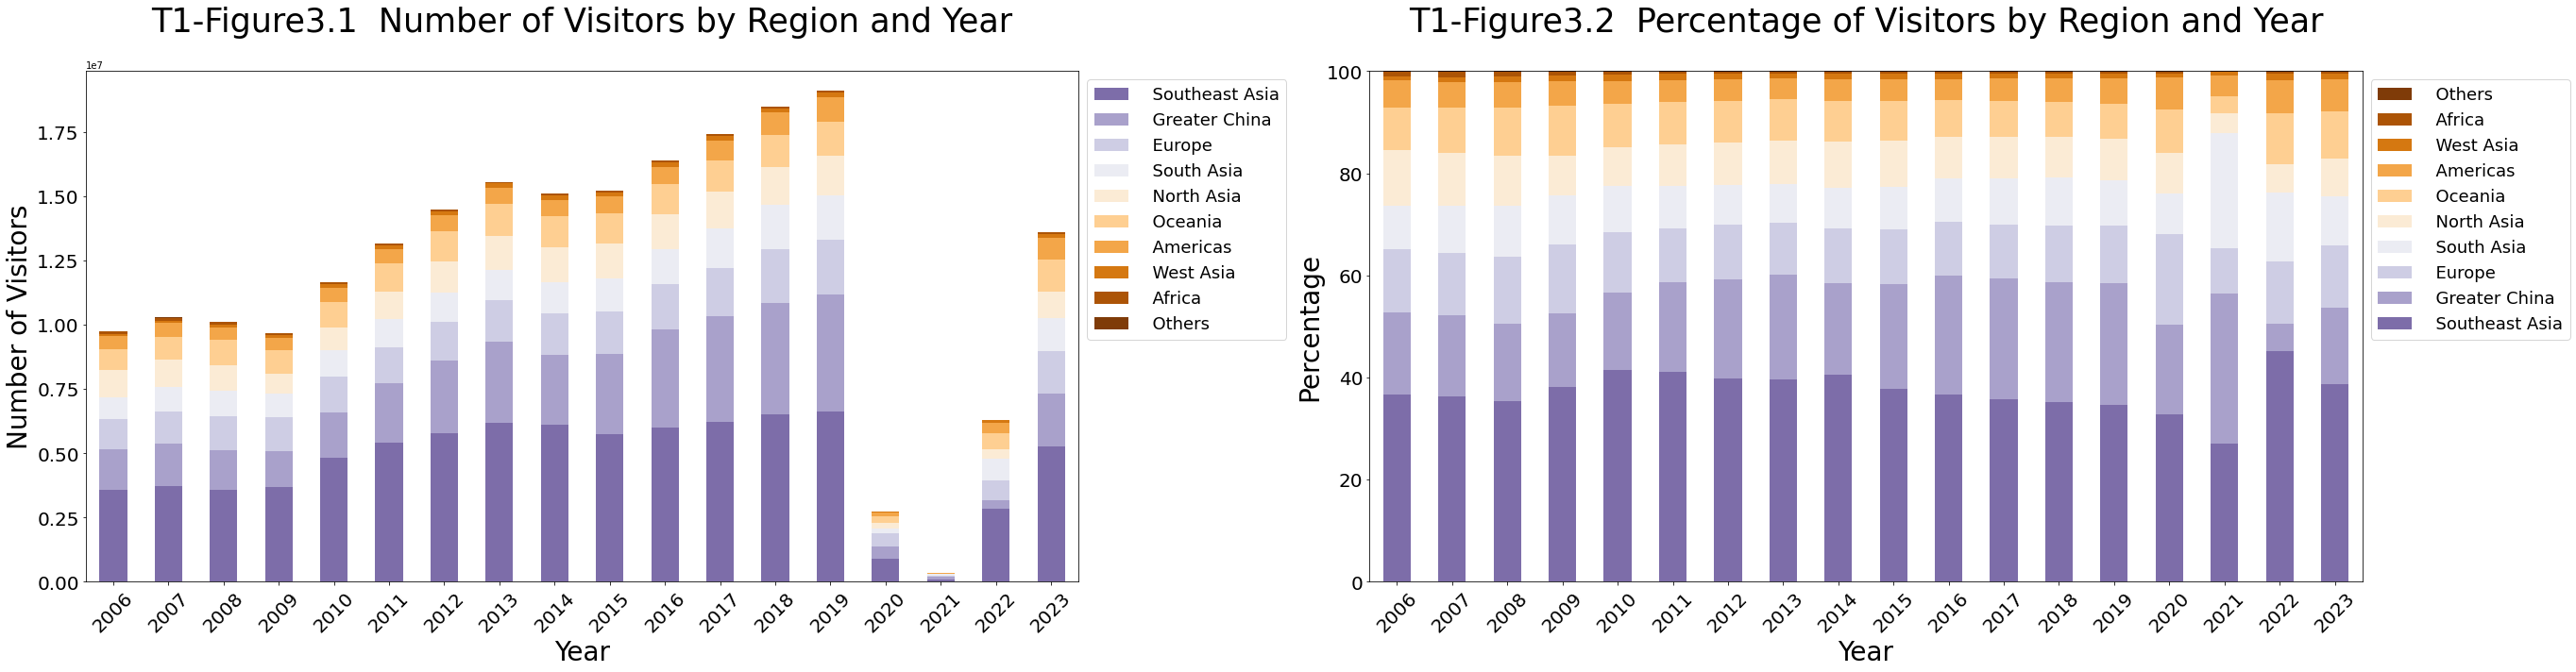

In [27]:
# Assume df_y is already defined
data_series_column = 'Data Series'
year_columns = df_y.columns[3:]

# Convert year columns to numeric
df_y[year_columns] = df_y[year_columns].apply(pd.to_numeric, errors='coerce')

# Convert data to a format suitable for stacked bar plots
df_y_melted = df_y.melt(id_vars=[data_series_column], value_vars=year_columns, var_name='Year', value_name='Number of Visitors')

# Pivot the data back to a format suitable for plotting
stacked_data = df_y_melted.pivot_table(index='Year', columns=data_series_column, values='Number of Visitors', fill_value=0, aggfunc='sum')

# Sort columns by total visitors to ensure the largest countries/regions are at the bottom
total_visitors = stacked_data.sum().sort_values(ascending=False)
stacked_data = stacked_data[total_visitors.index]

# Calculate percentages
percentage_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Generate more colors
num_colors = len(stacked_data.columns)
extra_colors = plt.cm.PuOr(np.linspace(0, 0.85, num_colors * 2))
color_list = extra_colors[::2]  # Select alternating colors
color_list = np.flipud(color_list[:num_colors])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(38, 10))

# Plot the stacked bar chart on the left
stacked_data.plot(kind='bar', stacked=True, ax=ax1, color=color_list)

ax1.set_title('T1-Figure3.1  Number of Visitors by Region and Year', fontsize=35, pad=42)
ax1.set_xlabel('Year', fontsize=28)
ax1.set_ylabel('Number of Visitors', fontsize=28)
ax1.set_ylim(0, stacked_data.values.max() * 3)  # Set the y-axis range for the left plot
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 18})
ax1.tick_params(axis='x', labelsize=20, rotation=45)
ax1.tick_params(axis='y', labelsize=20)

# Plot the percentage stacked bar chart on the right
# Ensure the color order matches the left plot
bars = percentage_data.plot(kind='bar', stacked=True, ax=ax2, color=color_list)

ax2.set_title('T1-Figure3.2  Percentage of Visitors by Region and Year', fontsize=35, pad=42)
ax2.set_xlabel('Year', fontsize=28)
ax2.set_ylabel('Percentage', fontsize=28)
ax2.set_ylim(0, 100)  # Set the y-axis range for the right plot to 0-100
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 18})
ax2.tick_params(axis='x', labelsize=20, rotation=45)
ax2.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()

#### Findings 4
* Number of visitors from each region showed a gradual upward trend from 2006 to 2019. After a significant decline due to COVID, the numbers have gradually rebounded but have not yet returned to 2019 levels.
* In 2021, the proportion of visitors from Greater China and South Asia significantly increased but dropped back to the original levels in 2022, with Greater China even falling below the 2020‘s proportion. 
* In 2022, the proportion of visitors from Southeast Asia rebounded significantly, accounting for nearly half of the total share.

In [14]:
df4.loc[:, 'Tag'] = ''
current_tag = 1
current_area = None
for idx, row in df4.iterrows():
    if row['Leading Spaces'] == 2:
        current_area = row[data_series_column]
        df4.loc[idx, 'Tag'] = current_tag
        current_tag += 1
    elif row['Leading Spaces'] == 4 and current_area is not None:
        df4.loc[idx, 'Tag'] = df4.loc[df2[data_series_column] == current_area, 'Tag'].values[0]

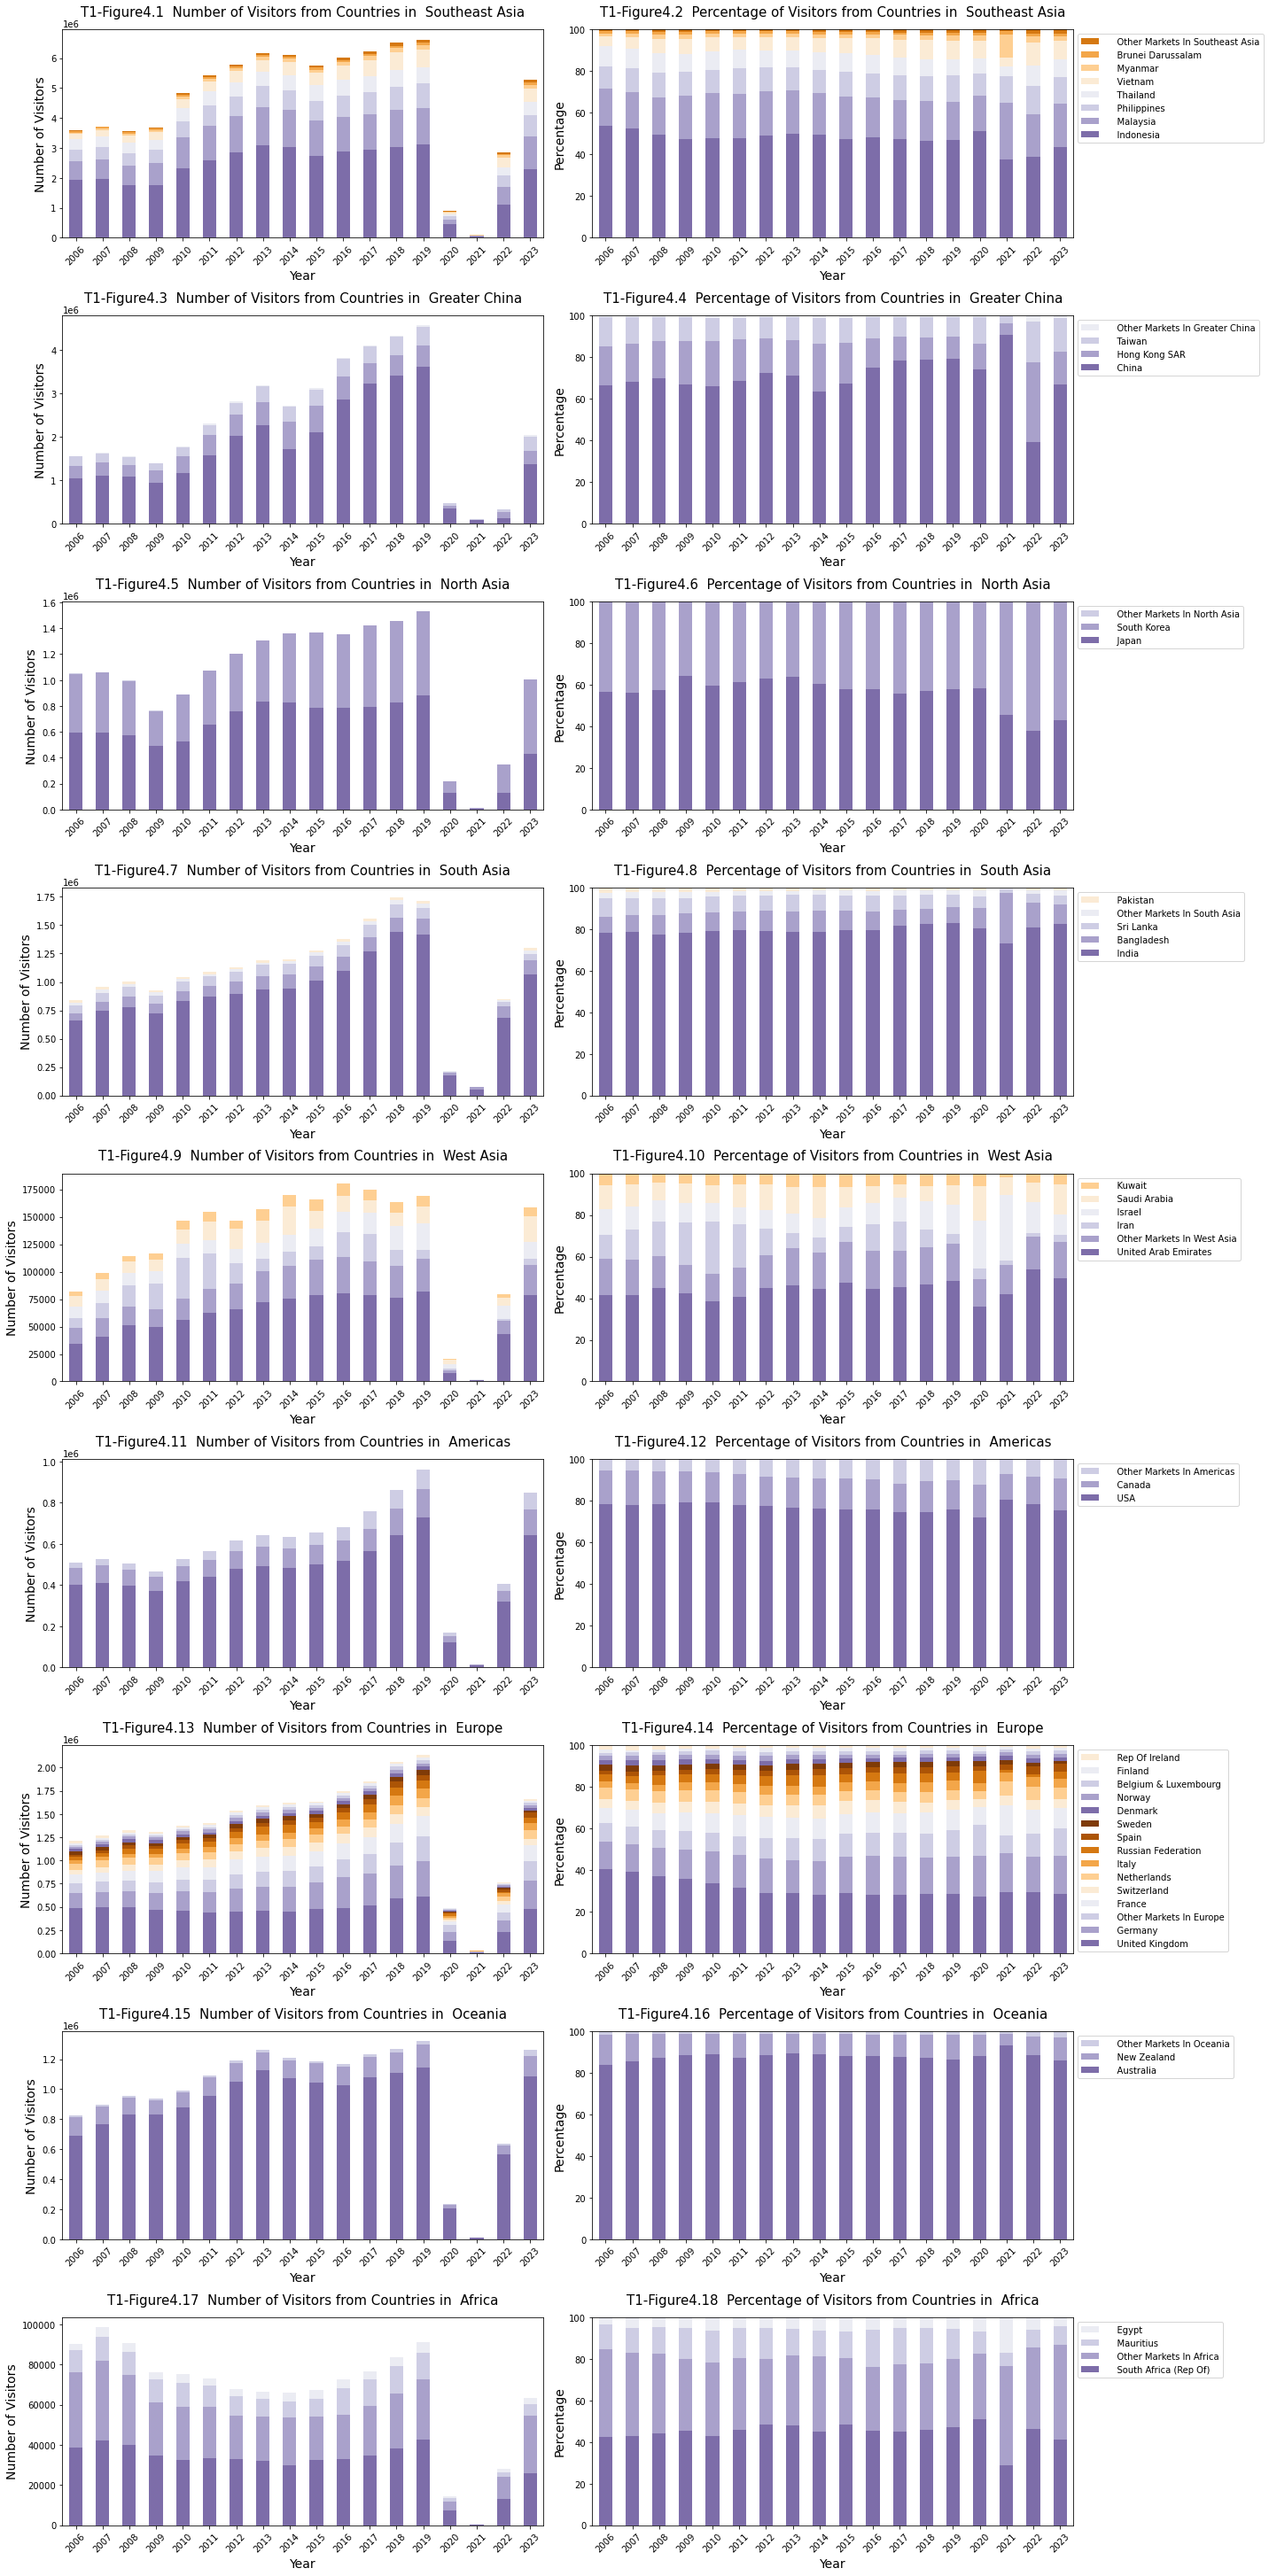

In [15]:
# Assume df4 is your DataFrame containing the relevant data with a 'Tag' column
data_series_column = 'Data Series'
year_columns = df4.columns[3:-1]  # Year columns from the 5th to the second last column, the last column is Tag

# Filter out all area names (Category is 2)
areas = df4[df4['Category'] == '2'][data_series_column].unique()

# Exclude the last area
areas = areas[:-1]

# Create a figure with multiple subplots
fig, axs = plt.subplots(len(areas), 2, figsize=(20, 4.5 * len(areas)))


# Plot each area's subplots
for i, area in enumerate(areas):
    ax1 = axs[i, 0]
    ax2 = axs[i, 1]
    # Filter out the countries belonging to the area (Category is 3)
    area_tag = df4.loc[df4[data_series_column] == area, 'Tag'].values[0]
    countries = df4[(df4['Category'] == '3') & (df4['Tag'] == area_tag)]
    
    if countries.empty:
        ax1.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
        ax1.set_title(f'Number of Visitors from Countries in {area}')
        ax2.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
        ax2.set_title(f'Percentage of Visitors from Countries in {area}')
        continue
    
    # Convert data to a format suitable for stacked bar plots
    countries_melted = countries.melt(id_vars=[data_series_column], value_vars=year_columns, var_name='Year', value_name='Number of Visitors')
    stacked_data = countries_melted.pivot_table(index='Year', columns=data_series_column, values='Number of Visitors', fill_value=0)
    
    # Sort the columns by total visitors to ensure the largest countries are at the bottom
    total_visitors = stacked_data.sum().sort_values(ascending=False)
    stacked_data = stacked_data[total_visitors.index]
    
    # Calculate percentages
    percentage_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
    
    # Calculate the title number
    title_number = i * 2 + 1
    title_number1 = i * 2 + 2
    # Plot the stacked bar chart
    stacked_data.plot(kind='bar', stacked=True, ax=ax1, color=color_list)
    ax1.set_title(f'T1-Figure4.{title_number}  Number of Visitors from Countries in{area}', fontsize=15, pad=15)
    ax1.set_xlabel('Year', fontsize=14)
    ax1.set_ylabel('Number of Visitors', fontsize=14)
    ax1.legend().set_visible(False)  # Hide legend for the left plot
    ax1.set_xticklabels(stacked_data.index, rotation=45)
    
    # Plot the percentage stacked bar chart
    percentage_data.plot(kind='bar', stacked=True, ax=ax2, color=color_list)
    ax2.set_title(f'T1-Figure4.{title_number1}  Percentage of Visitors from Countries in{area}', fontsize=15, pad=15)
    ax2.set_xlabel('Year', fontsize=14)
    ax2.set_ylabel('Percentage', fontsize=14)
    ax2.set_ylim(0, 100)  # Set y-axis range to 0-100
    handles, labels = ax2.get_legend_handles_labels()
    ax2.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1))  # Reverse the legend order
    ax2.set_xticklabels(percentage_data.index, rotation=45)

plt.tight_layout()
plt.show()

#### Findings 5
* In Greater China, 2021, the share of visitors from Mainland China increased, but it decreased in 2022. From the left chart, it can be seen that the total number from Mainland China in 2022 is similar to that in 2021, the expected rebound did not occur, possibly because mainland China's pandemic control ended later than other parts of this region.
* Among North Asian visitors, South Korea and Japan have relatively equal shares. From 2021 onwards, the share of South Korean visitors gradually surpassed that of Japanese visitors.
* The proportion of visitors from Iran in west Asia peaked in 2010 and then gradually declined.
* Nearly half of the visitors from Africa are come from South Africa.

## Month-by-Month Analysis

### Step 7: Draw bar charts for visitors from each months.

* We want to show the visitor distribution across different regions for each month. Therefore, we created bar charts for each region, highlighting the maximum and minimum values.

*Figure for total is same as the former one, so let's just skip it.

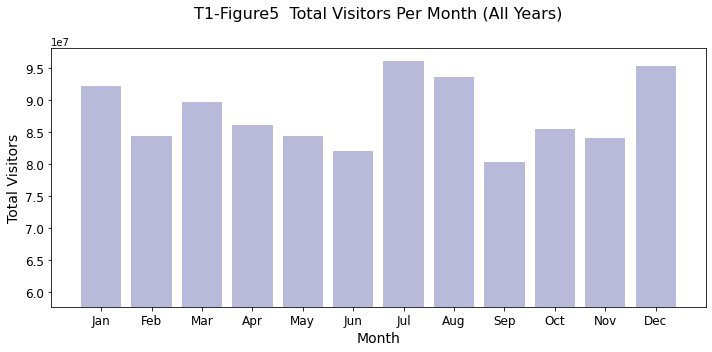

In [16]:
# Select all columns that represent months (January to December) across all years
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_columns = [col for col in df.columns if any(month in col for month in months)]

# Convert data to numeric type and sum by month
total_visitors_per_month = df[monthly_columns].apply(pd.to_numeric, errors='coerce').sum(axis=0)

# Create a new DataFrame containing months and their total visitors
month_visitor_summary = pd.DataFrame({
    'Month': [col.split()[1] for col in monthly_columns],
    'Total Visitors': total_visitors_per_month.values
})

# Group by month and sum the total visitors for all years
month_visitor_summary_grouped = month_visitor_summary.groupby('Month').sum().reindex(months)

# Plot a bar chart with the total visitors per month
plt.figure(figsize=(10, 5))
plt.bar(month_visitor_summary_grouped.index, month_visitor_summary_grouped['Total Visitors'], color='#b9b9da')
plt.title('T1-Figure5  Total Visitors Per Month (All Years)', fontsize=16, pad=30)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Visitors', fontsize=14)
plt.ylim(month_visitor_summary_grouped['Total Visitors'].max() * 0.6, month_visitor_summary_grouped['Total Visitors'].max() * 1.02) # Adjust the y-axis range for better visibility
plt.tick_params(axis='x', labelsize=12)  
plt.tick_params(axis='y', labelsize=12) 


plt.tight_layout()
plt.show()

C:\Users\iFeng Plus\AppData\Local\Temp\ipykernel_11188\2534266421.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=45)
C:\Users\iFeng Plus\AppData\Local\Temp\ipykernel_11188\2534266421.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=45)
C:\Users\iFeng Plus\AppData\Local\Temp\ipykernel_11188\2534266421.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=45)
C:\Users\iFeng Plus\AppData\Local\Temp\ipykernel_11188\2534266421.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=45)
C:\Users\iFeng Plus\AppData\Local\Temp\ipykernel_11188\2534266421.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=45)
C:\Users\iFeng Plus\AppData\Local\Temp\ipykernel_1

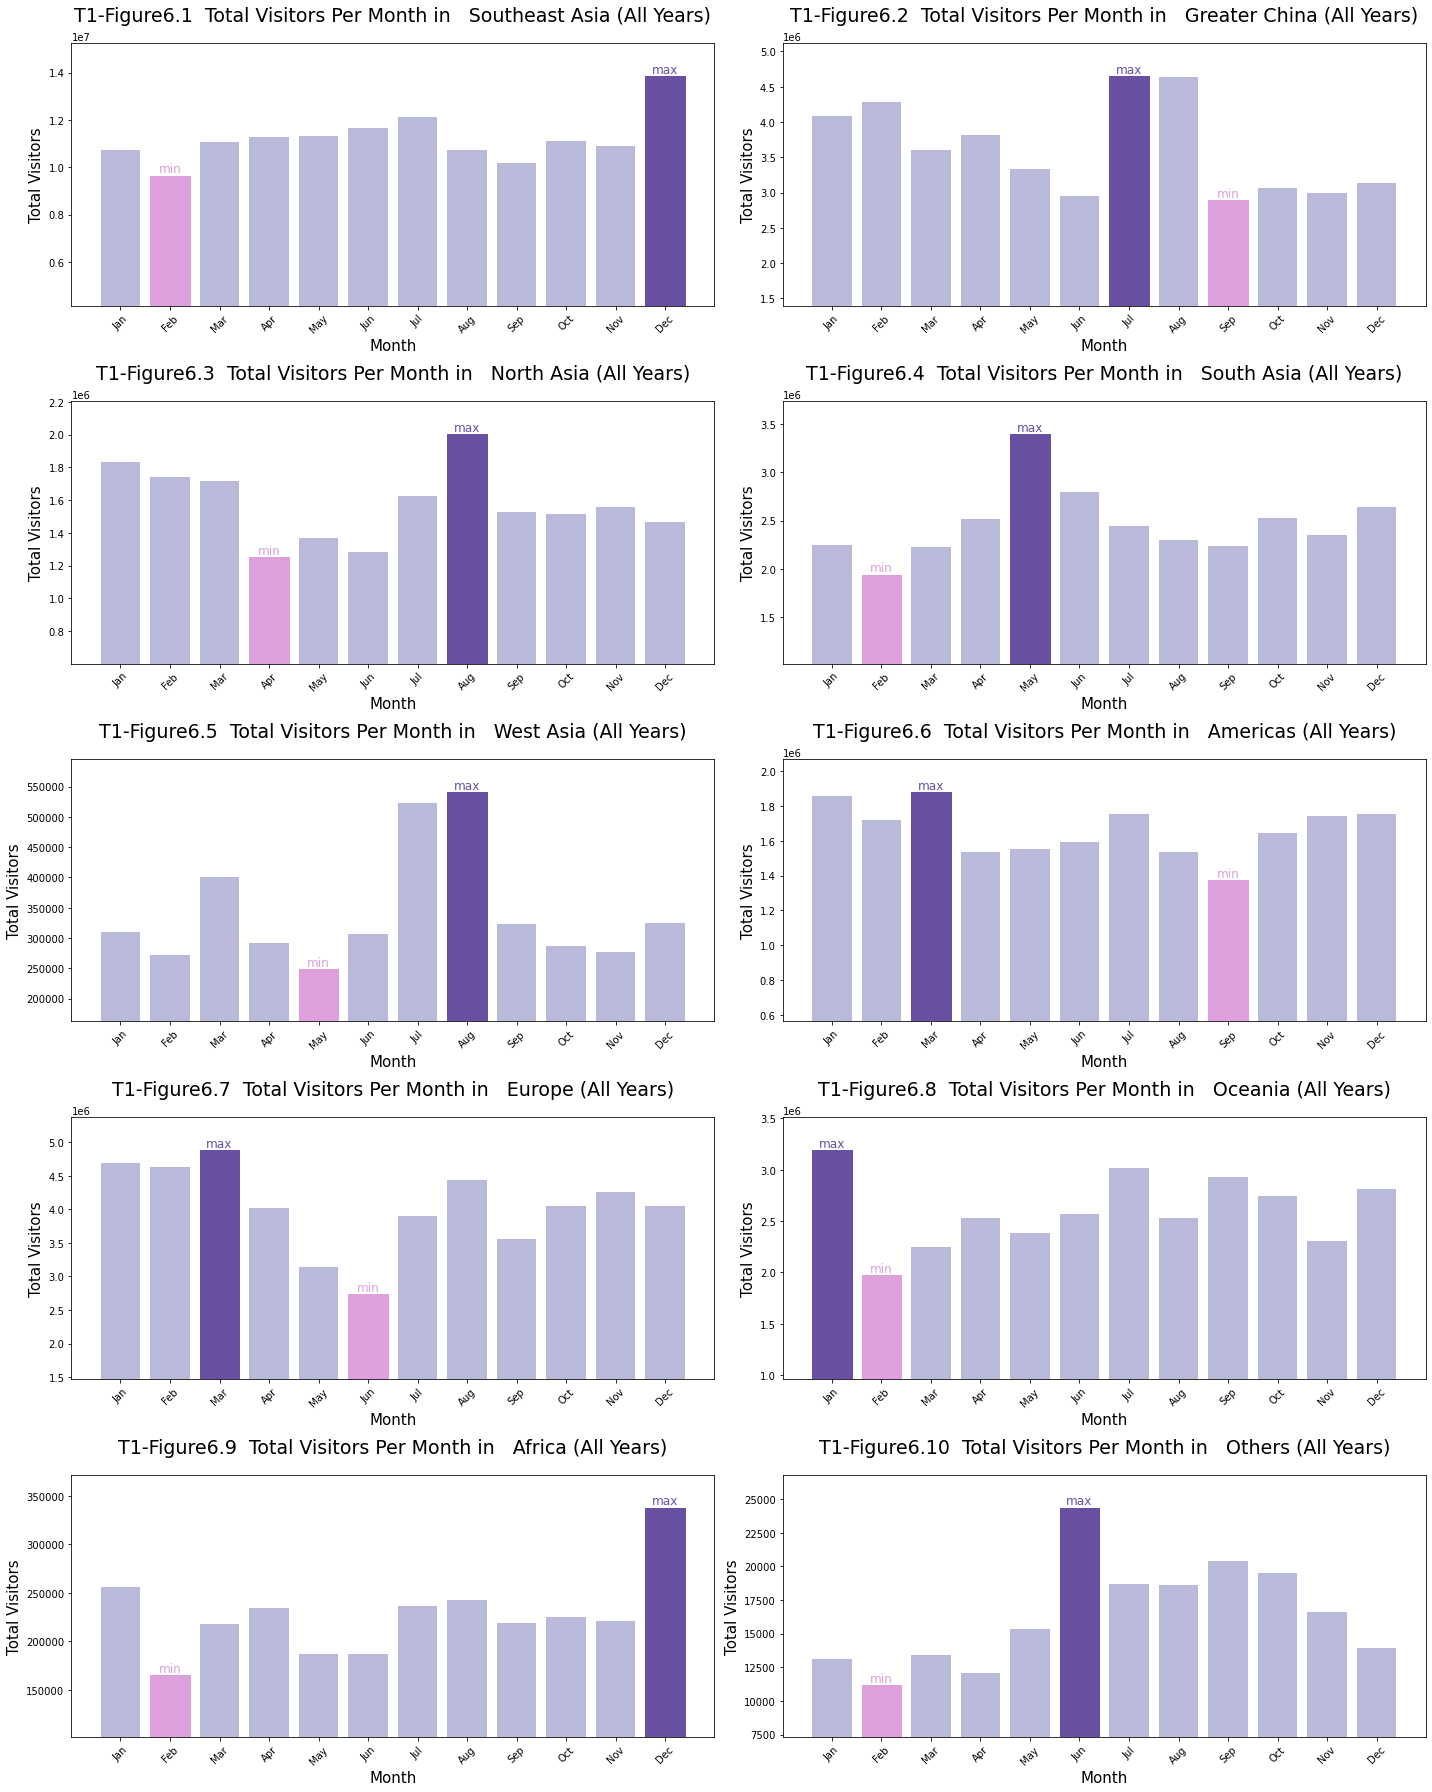

In [17]:
areas = df[df['Leading Spaces'] == 2]['Data Series']
deep_purple = '#694fa2'
light_purple = '#dda0dd'

fig, axs = plt.subplots(5, 2, figsize=(20, 25))
axs = axs.flatten()

for i, area in enumerate(areas):
    # Filter data for the current area
    area_data = df[df['Data Series'].str.contains(area, na=False)]
    
    # Sum data by month
    total_visitors_per_month = area_data[monthly_columns].apply(pd.to_numeric, errors='coerce').sum(axis=0)
    
    # Create a DataFrame containing months and their total visitors for the current area
    month_visitor_summary = pd.DataFrame({
        'Month': [col.split()[1] for col in monthly_columns],
        'Total Visitors': total_visitors_per_month.values
    })
    
    # Group by month and sum the total visitors for all years
    month_visitor_summary_grouped = month_visitor_summary.groupby('Month').sum().reindex(months)
    
    # Plot a bar chart with the total visitors per month and adjust the y-axis range
    ax = axs[i]
    bars = ax.bar(month_visitor_summary_grouped.index, month_visitor_summary_grouped['Total Visitors'], color='#b9b9da')
    ax.set_title(f'T1-Figure6.{i+1}  Total Visitors Per Month in {area} (All Years)', fontsize=19, pad=22)
    ax.set_xlabel('Month', fontsize=15)
    ax.set_ylabel('Total Visitors', fontsize=15) 
    ax.set_ylim(month_visitor_summary_grouped['Total Visitors'].max() * 0.3, month_visitor_summary_grouped['Total Visitors'].max() * 1.1)  # Adjust the y-axis range for better visibility
    ax.set_xticklabels(months, rotation=45)
    
    # Highlight the max and min bars
    max_value = month_visitor_summary_grouped['Total Visitors'].max()
    min_value = month_visitor_summary_grouped['Total Visitors'].min()
    for bar in bars:
        height = bar.get_height()
        if height == max_value:
            bar.set_color(deep_purple)  # Color for max value
            ax.text(bar.get_x() + bar.get_width() / 2, height, 'max', ha='center', va='bottom', fontsize=12, color=deep_purple)
        elif height == min_value:
            bar.set_color(light_purple)  # Color for min value
            ax.text(bar.get_x() + bar.get_width() / 2, height, 'min', ha='center', va='bottom', fontsize=12, color=light_purple)

plt.tight_layout()
plt.show()


#### Findings 3
* Visitor distribution from Southeast Asia is relatively even throughout the year, with a peak in December. This may be because the tropical location minimizes climate impact.
* Visitors from other regions of Asia peak in late spring to early summer (May to August), with East Asia and North Asia also having a secondary peak in winter, likely due to colder winter temperatures in these regions.
* Visitor peaks from Europe and the Americas are concentrated from January to March, possibly because these regions have colder winters due to their higher latitudes.
* For Africa and Oceania, visitor peaks occur in winter, with a secondary peak in summer, possibly because they are in the Southern Hemisphere where seasons are opposite to those in the Northern Hemisphere. Notably, South Africa, located in the Southern Hemisphere, contributes nearly 50% of the tourist numbers from Africa.

## Fluctuations Analysis

## Step 8: Draw charts to show fluctuations of visitors from each areas in months

* We want to show the fluctuations of visitors from different regions and countries on a monthly scale. 
* Therefore, we created a combined line chart to illustrate these variations.

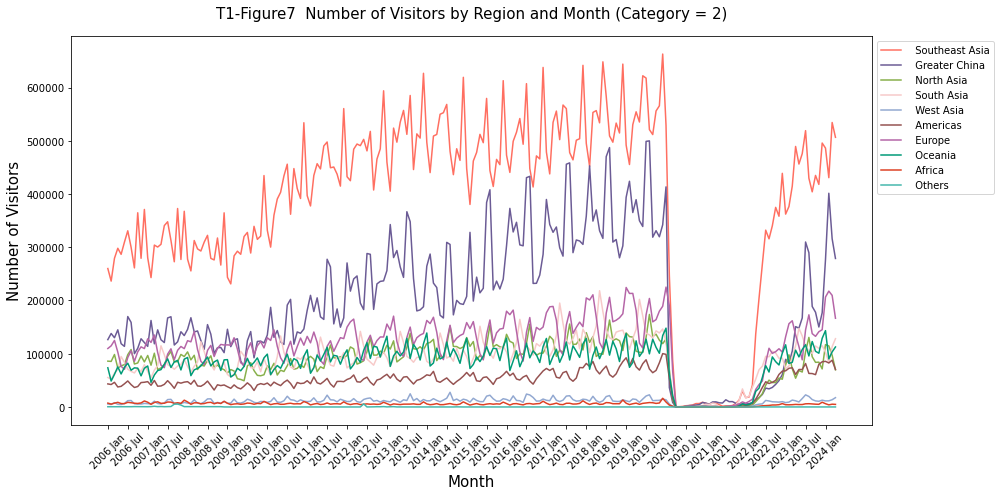

In [18]:
data_series_column = 'Data Series'
month_columns = [col for col in df1.columns if isinstance(col, str) and any(char.isdigit() for char in col)]
df_category_2 = df1[df1['Category'] == '2']


plt.figure(figsize=(14, 7))

color_list = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', 
              '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC', 
              '#EFC050', '#5B5EA6', '#9B2335', '#DFCFBE', '#55B4B0']

for region, color in zip(df_category_2[data_series_column].unique(), color_list):
    region_data = df_category_2[df_category_2[data_series_column] == region][month_columns].transpose()
    region_data.columns = [region]
    plt.plot(region_data, label=region, color=color)
    
plt.title('T1-Figure7  Number of Visitors by Region and Month (Category = 2)', fontsize=15, pad=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Visitors', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(ticks=range(0, len(month_columns), 6), labels=[month_columns[i] for i in range(0, len(month_columns), 6)], rotation=45)

plt.tight_layout()
plt.show()

#### Findings 6
* The line graphs for each region and country display distinct and regular patterns of fluctuation(like the orange line, the M-shaped pink line, the brone line...and for the countries it's the same), reflecting the stable but varied seasonal effects of different regions and countrys.

In [19]:
df1.loc[:, 'Tag'] = ''

current_tag = 1
current_area = None
for idx, row in df1.iterrows():
    if row['Leading Spaces'] == 2:
        current_area = row[data_series_column]
        df1.loc[idx, 'Tag'] = current_tag
        current_tag += 1
    elif row['Leading Spaces'] == 4 and current_area is not None:
        df1.loc[idx, 'Tag'] = df1.loc[df1[data_series_column] == current_area, 'Tag'].values[0]

C:\Users\iFeng Plus\AppData\Local\Temp\ipykernel_11188\193039622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'Tag'] = ''


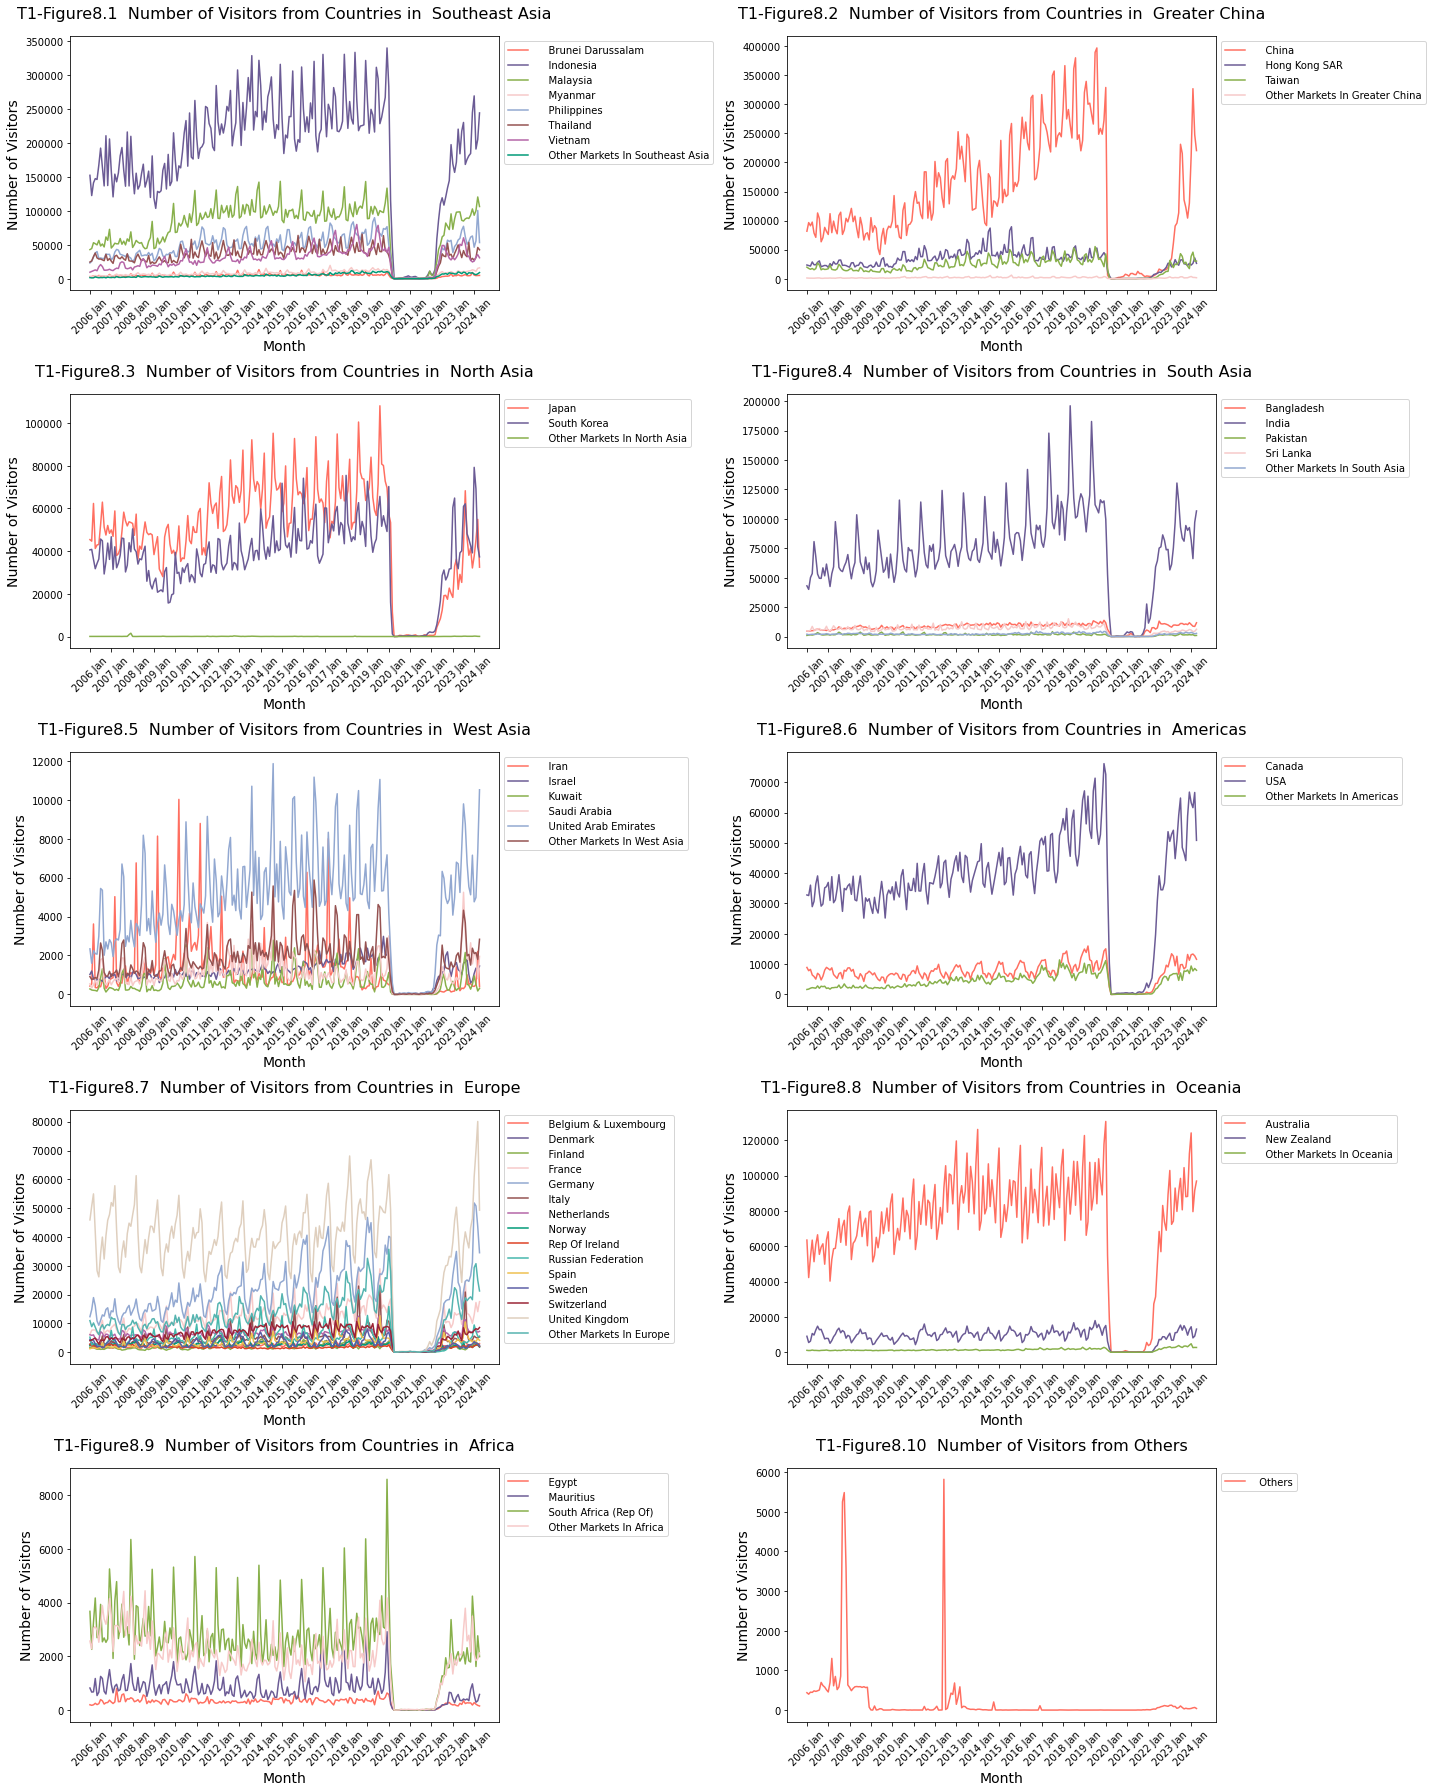

In [20]:
# Example DataFrame initialization (replace this with actual data loading)
# df1 = pd.read_csv('your_data_file.csv')

# Ensure the necessary columns exist in df1
data_series_column = 'Data Series'
month_columns = df1.columns[3:-1]

# Create a figure with ten subplots
fig, axs = plt.subplots(5, 2, figsize=(20, 25))
axs = axs.flatten()

# Filter out all area names (Leading Spaces equals 2)
areas = df1[df1['Leading Spaces'] == 2][data_series_column].unique()

# define colors list
color_list = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', 
              '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC', 
              '#EFC050', '#5B5EA6', '#9B2335', '#DFCFBE', '#55B4B0']

# Plot the first nine areas
for i, area in enumerate(areas[:9]):  # Only plot the first 9 areas
    ax = axs[i]
    area_data = df1[df1[data_series_column] == area]
    
    # Filter out the countries belonging to the area (Leading Spaces equals 4)
    countries = df1[(df1['Leading Spaces'] == 4) & (df1['Tag'] == df1.loc[df1[data_series_column] == area, 'Tag'].values[0])]
    
    if countries.empty:
        ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'Number of Visitors from Countries in {area}')
        continue
    
    country_colors = zip(countries[data_series_column].unique(), color_list)
    for country, color in country_colors:
        country_data = countries[countries[data_series_column] == country][month_columns].transpose()
        country_data.columns = [country]
        ax.plot(country_data, label=country, color=color)  # 设置曲线颜色
        
    ax.set_title(f'T1-Figure8.{i+1}  Number of Visitors from Countries in{area}', fontsize=16, pad=18)
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel('Number of Visitors', fontsize=14)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xticks(range(0, len(month_columns), 12))
    ax.set_xticklabels([month_columns[i] for i in range(0, len(month_columns), 12)], rotation=45)

# Plot the last subplot for countries with Tag 10
ax = axs[9]
countries = df1[df1['Tag'] == 10]

if countries.empty:
    ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.set_title(f'Number of Visitors from Countries with Tag 10')
else:
    country_colors = zip(countries[data_series_column].unique(), color_list)
    for country, color in country_colors:
        country_data = countries[countries[data_series_column] == country][month_columns].transpose()
        country_data.columns = [country]
        ax.plot(country_data, label=country, color=color)  # 设置曲线颜色
    
    ax.set_title(f'T1-Figure8.10  Number of Visitors from Others', fontsize=16, pad=18)
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel('Number of Visitors', fontsize=14)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xticks(range(0, len(month_columns), 12))
    ax.set_xticklabels([month_columns[i] for i in range(0, len(month_columns), 12)], rotation=45)

plt.tight_layout()
plt.show()


## Step 9: Draw charts to show fluctuations of visitors from each areas in months

* Then we tried to compare the YoY monthly growth rate in different regions and countries by line charts, but did not obtain useful information.
* Therefore, we are now trying to observe the overall changes using annual data with less detailed information.

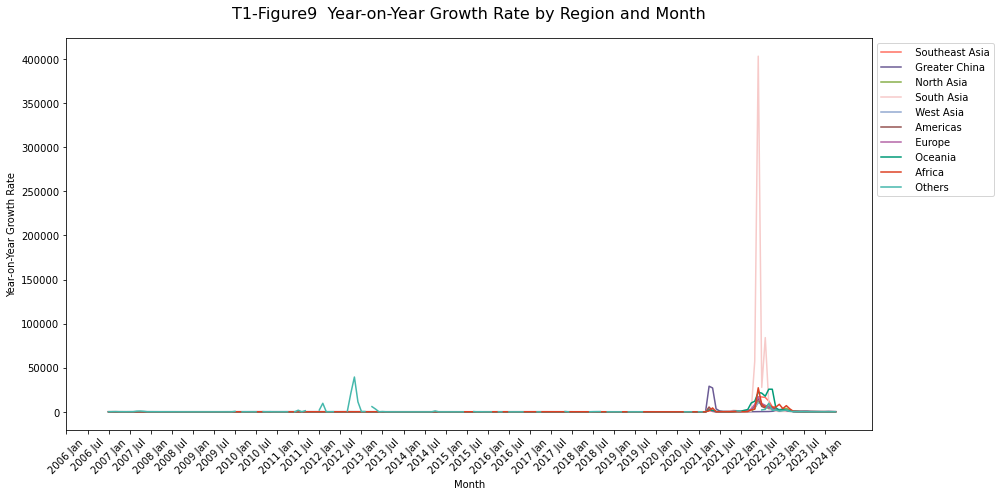

In [21]:
data_series_column = 'Data Series'
month_columns = [col for col in df1.columns if isinstance(col, str) and any(char.isdigit() for char in col)]
df_category_2 = df3[df3['Leading Spaces'] == 2]

color_list = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', 
              '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC', 
              '#EFC050', '#5B5EA6', '#9B2335', '#DFCFBE', '#55B4B0']

plt.figure(figsize=(14, 7))

# Iterate through each region and apply the color list
for i, region in enumerate(df_category_2[data_series_column].unique()):
    region_data = df_category_2[df_category_2[data_series_column] == region][month_columns].transpose()
    region_data.columns = [region]
    plt.plot(region_data, label=region, color=color_list[i % len(color_list)])  # Apply color list

plt.title('T1-Figure9  Year-on-Year Growth Rate by Region and Month', fontsize=16, pad=20)
plt.xlabel('Month')
plt.ylabel('Year-on-Year Growth Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust x-ticks to display every 6th month
plt.xticks(ticks=range(0, len(month_columns), 6), labels=[month_columns[i] for i in range(0, len(month_columns), 6)], rotation=45)

plt.tight_layout()
plt.show()


In [22]:
df3.loc[:, 'Tag'] = ''

current_tag = 1
current_area = None
for idx, row in df2.iterrows():
    if row['Leading Spaces'] == 2:
        current_area = row[data_series_column]
        df3.loc[idx, 'Tag'] = current_tag
        current_tag += 1
    elif row['Leading Spaces'] == 4 and current_area is not None:
        df3.loc[idx, 'Tag'] = df3.loc[df3[data_series_column] == current_area, 'Tag'].values[0]

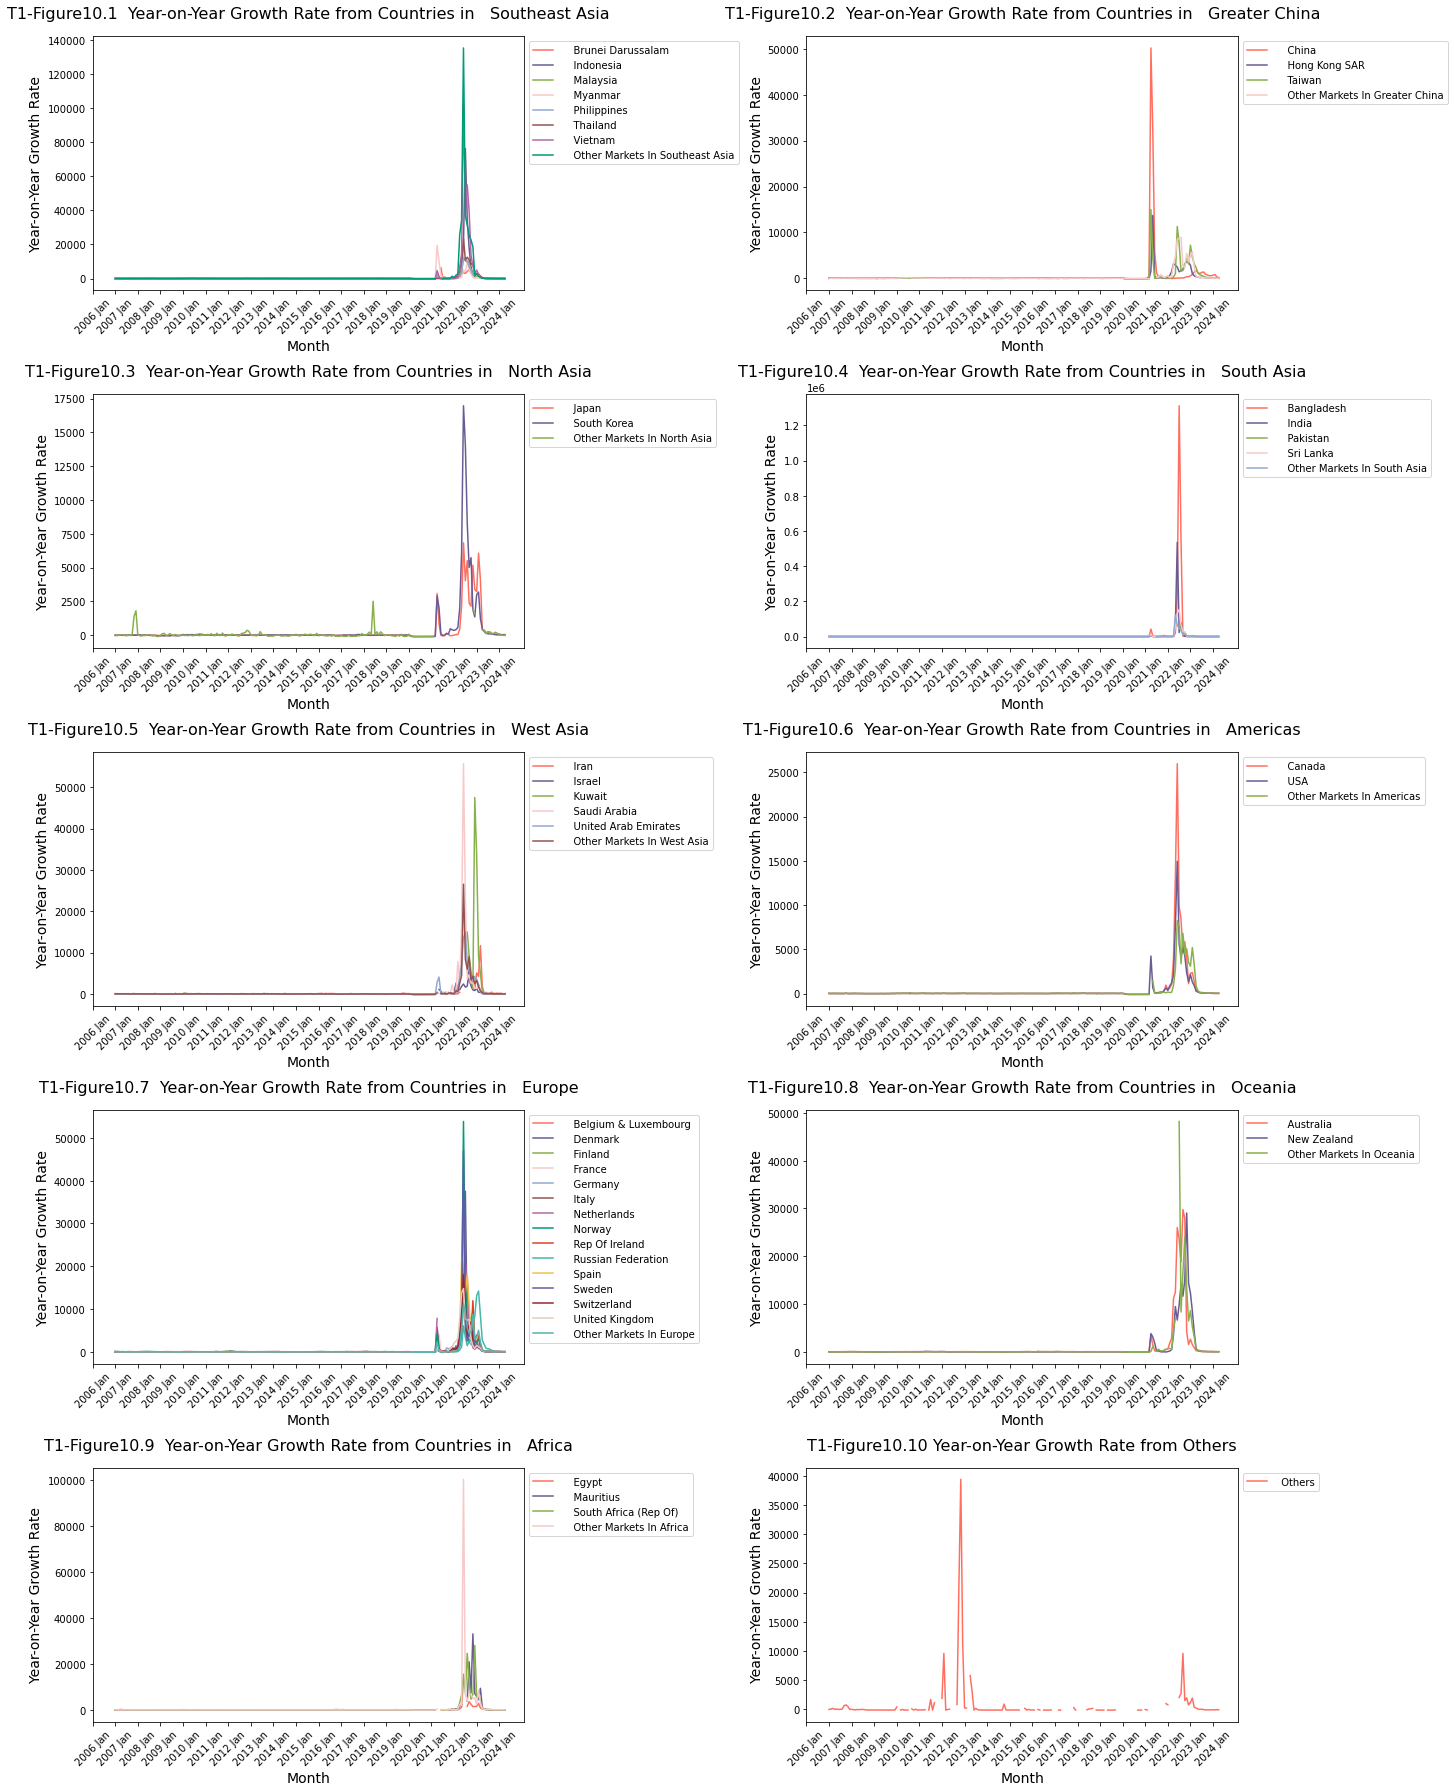

In [23]:
data_series_column = 'Data Series'
month_columns = df3.columns[3:-1]

# Create a figure with ten subplots
fig, axs = plt.subplots(5, 2, figsize=(20, 25))
axs = axs.flatten()

# Filter out all area names (Category is 2)
areas = df3[df3['Leading Spaces'] == 2][data_series_column].unique()

color_list = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', 
              '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC', 
              '#EFC050', '#5B5EA6', '#9B2335', '#DFCFBE', '#55B4B0']

# Plot the first nine areas
for i, area in enumerate(areas[:9]):  # Only plot the first 9 areas
    ax = axs[i]
    area_data = df3[df3[data_series_column] == area]
    
    # Filter out the countries belonging to the area (Category is 4)
    countries = df3[(df3['Leading Spaces'] == 4) & (df3['Tag'] == df3.loc[df3[data_series_column] == area, 'Tag'].values[0])]
    
    if countries.empty:
        ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'Number of Visitors from Countries in {area}')
        continue
    
    color_index = 0
    for country in countries[data_series_column].unique():
        country_data = countries[countries[data_series_column] == country][month_columns].transpose()
        country_data.columns = [country]
        ax.plot(country_data, label=country, color=color_list[color_index % len(color_list)])  # Add color from color_list
        color_index += 1
    
    ax.set_title(f'T1-Figure10.{i+1}  Year-on-Year Growth Rate from Countries in {area}', fontsize = 16, pad = 18)
    ax.set_xlabel('Month', fontsize = 14)
    ax.set_ylabel('Year-on-Year Growth Rate', fontsize = 14)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xticks(range(0, len(month_columns), 12))
    ax.set_xticklabels([month_columns[i] for i in range(0, len(month_columns), 12)], rotation=45)

# Plot the last subplot for countries with Tag 10
ax = axs[9]
countries = df3[df3['Tag'] == 10]

if countries.empty:
    ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.set_title(f'Number of Visitors from Countries with Tag 10')
else:
    color_index = 0
    for country in countries[data_series_column].unique():
        country_data = countries[countries[data_series_column] == country][month_columns].transpose()
        country_data.columns = [country]
        ax.plot(country_data, label=country, color=color_list[color_index % len(color_list)])  # Add color from color_list
        color_index += 1
    
    ax.set_title(f'T1-Figure10.10 Year-on-Year Growth Rate from Others', fontsize = 16, pad = 18)
    ax.set_xlabel('Month', fontsize = 14)
    ax.set_ylabel('Year-on-Year Growth Rate', fontsize = 14)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xticks(range(0, len(month_columns), 12))
    ax.set_xticklabels([month_columns[i] for i in range(0, len(month_columns), 12)], rotation=45)

plt.tight_layout()
plt.show()

## Step 10: Draw charts to show fluctuations of visitors from each areas in months

* Based on the infrence of COVID-19,we tried to use yearly data and drop records after 2019

In [24]:
year_columns = df4.columns[3:-3]  # Year columns from the 5th to the second last column
df5 = df4.copy()

# Calculate the year-on-year growth for each year compared to the previous year
df5[year_columns] = df4[year_columns].pct_change(axis='columns') * 100

# Remove the first year column as it doesn't have a previous year to compare with
df5 = df5.drop(columns=[year_columns[0]])

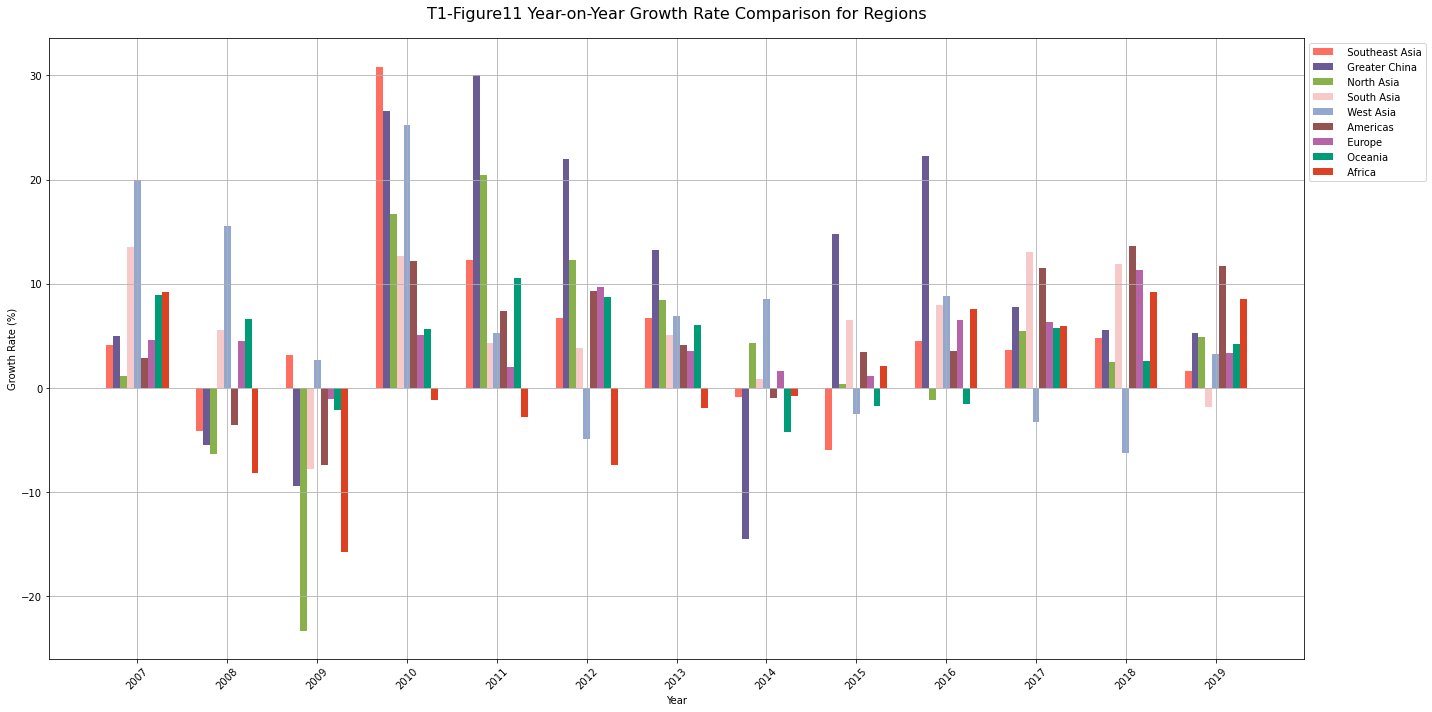

In [25]:
# Define the color list
color_list = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', 
              '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC', 
              '#EFC050', '#5B5EA6', '#9B2335', '#DFCFBE', '#55B4B0']

fig, ax = plt.subplots(figsize=(20, 10))

# Assuming df5 already exists and contains the 'Leading Spaces' column and year data

# Filter out rows where 'Leading Spaces' equals 2
df_filtered = df5[df5['Leading Spaces'] == 2]
df_filtered = df_filtered[df_filtered['Tag'] != 10]

# Year columns, from the fifth column to the third to last column
year_columns = df_filtered.columns[3:-5]

# Get data series
data_series = df_filtered['Data Series'].unique()

# Determine the position for each series
num_series = len(data_series)
x = np.arange(len(year_columns))  # Positions on the x-axis
width = 0.15  # Width of each bar
gap = 0.6  # Gap between each year

# Adjust x-axis positions to add the gap
adjusted_x = x * (num_series * width + gap)

# Plot grouped bar chart
for i, series in enumerate(data_series):
    series_data = df_filtered[df_filtered['Data Series'] == series]
    heights = series_data[year_columns].values[0]  # Assuming each series has only one row of data
    ax.bar(adjusted_x + i * width, heights, width, label=series, color=color_list[i % len(color_list)])

# Add title and labels
ax.set_title('T1-Figure11 Year-on-Year Growth Rate Comparison for Regions', fontsize = 16, pad = 20)
ax.set_xlabel('Year')
ax.set_ylabel('Growth Rate (%)')
ax.set_xticks(adjusted_x + (num_series - 1) * width / 2)
ax.set_xticklabels(year_columns, rotation=45)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)

plt.tight_layout()

# Display the plot
plt.show()


#### Findings 7
* Except for 2008 and 2009, the number of tourists from various regions gradually increased. The decline in 2008 and 2009 was significant due to the financial crisis. Notably, in 2009, the most severe year of the decline, West Asia and Southeast Asia experienced growth.
* The Greater China region maintained high growth for most of the period, with a significant drop in 2014, possibly due to policy and situational factors.
* While other regions saw steady growth from 2010 to 2014, Africa experienced a continuous decline during the same period.

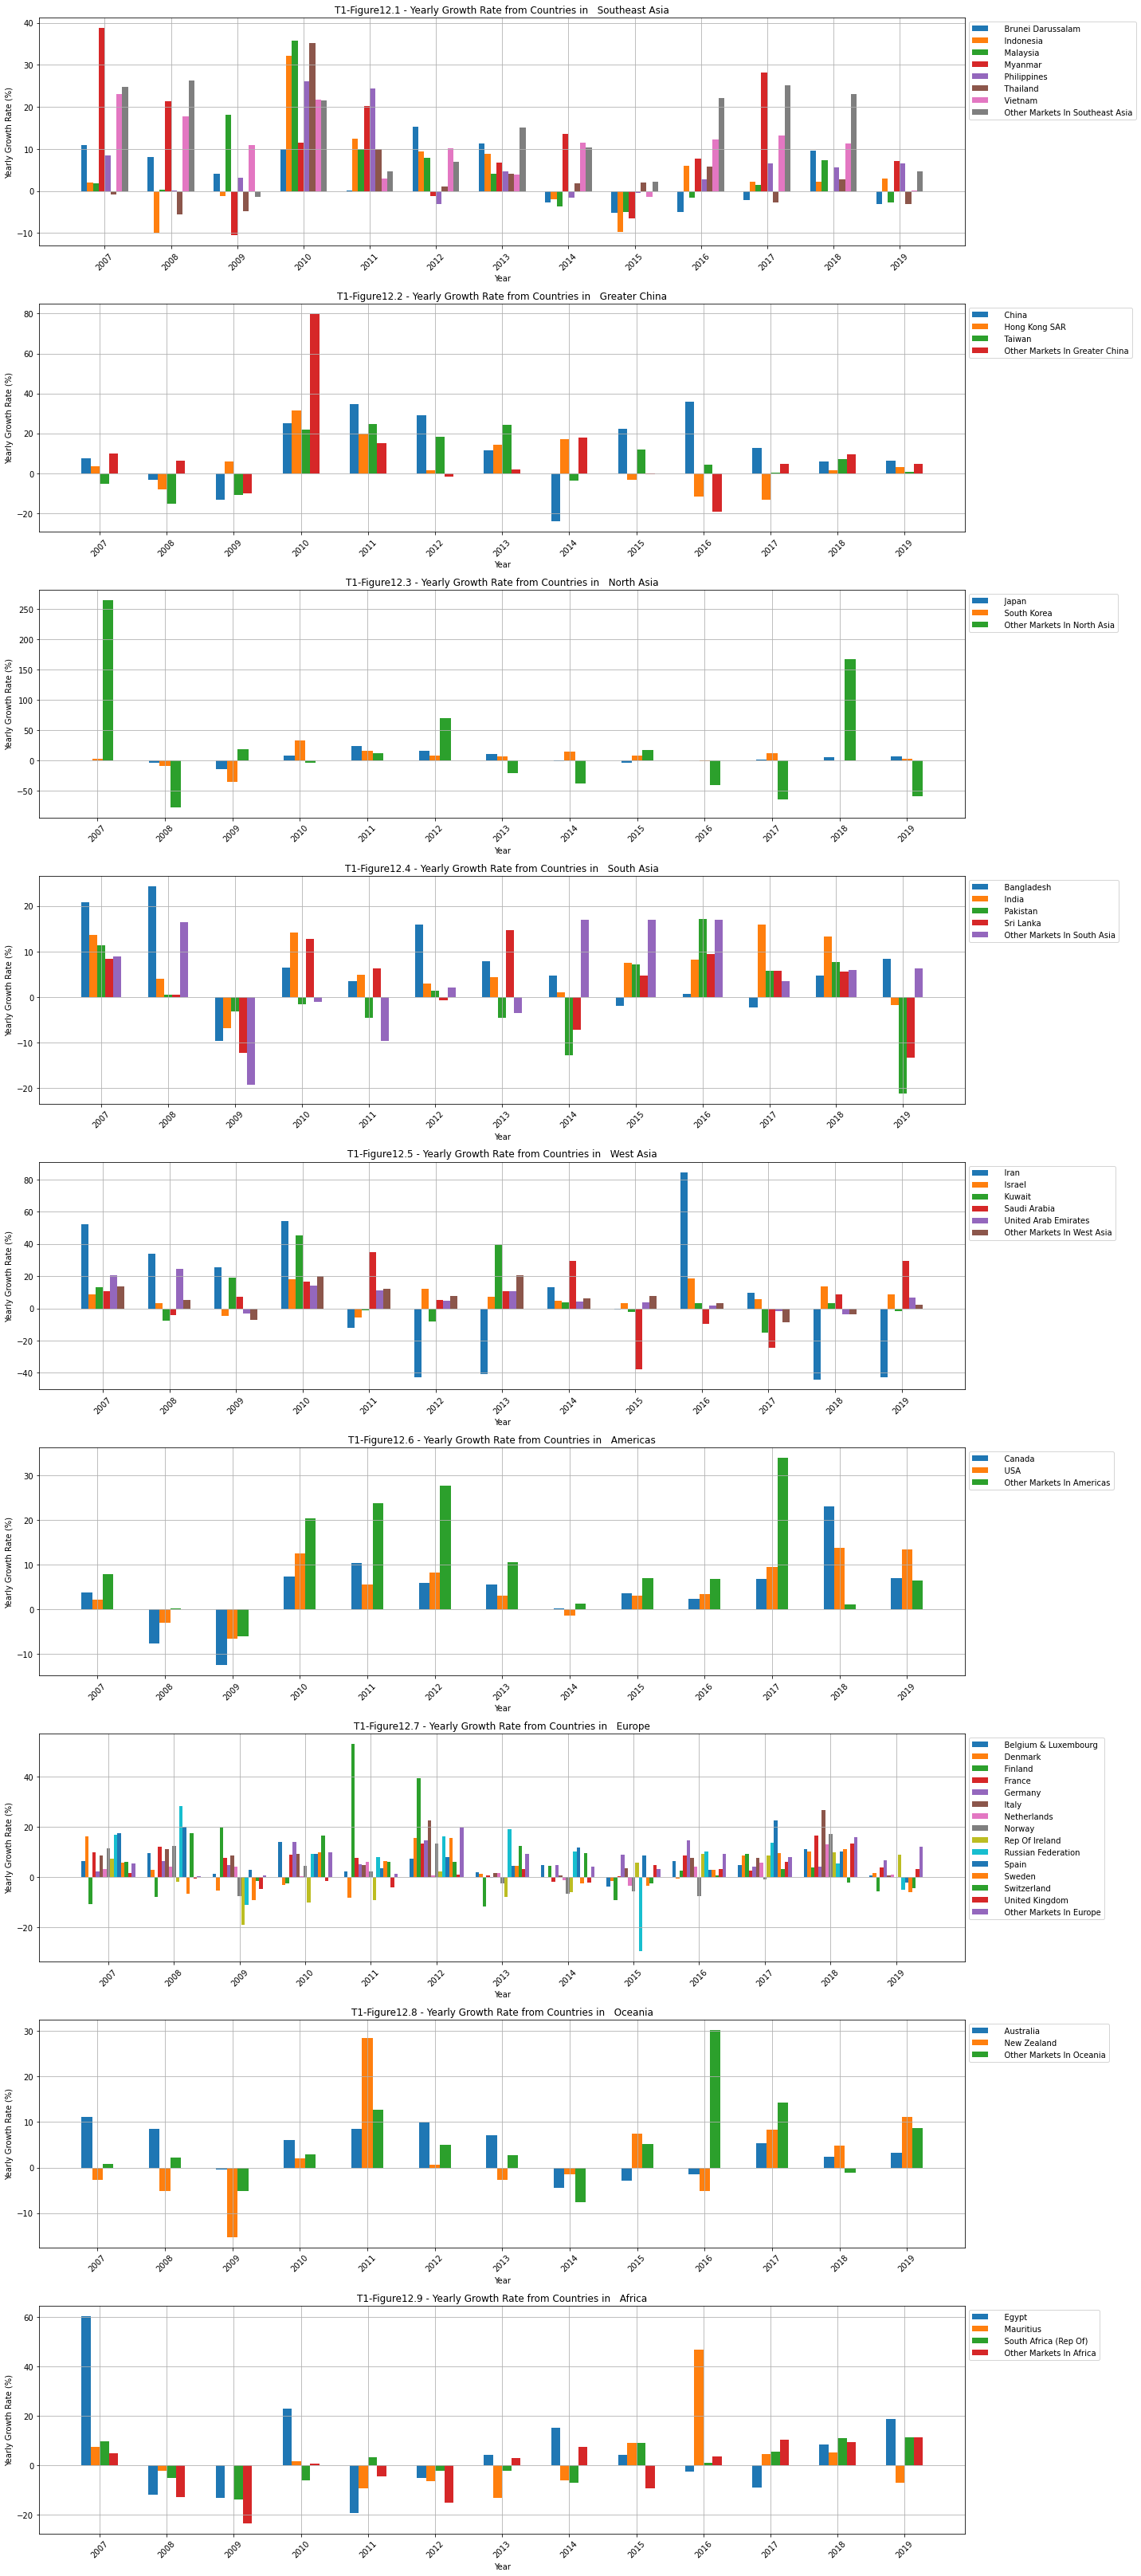

In [26]:
# Assuming df5 is a DataFrame containing the relevant data, including year columns and 'Tag' column
data_series_column = 'Data Series'
year_columns = df5.columns[3:-5]  # Year columns from the fifth to the third to last column

# Filter out all area names (Category is 2)
areas = df5[df5['Category'] == '2'][data_series_column].unique()

# Exclude the last area
areas = areas[:-1]

# Create a figure with multiple subplots
fig, axs = plt.subplots(len(areas), 1, figsize=(20, 5 * len(areas)))

# Plot bar charts for each area
for i, area in enumerate(areas):
    ax = axs[i]
    # Filter out the countries belonging to the area (Category is 3)
    area_tag = df5.loc[df5[data_series_column] == area, 'Tag'].values[0]
    countries = df5[(df5['Category'] == '3') & (df5['Tag'] == area_tag)]
    
    if countries.empty:
        ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'T1-Figure12.{i + 1} - Number of Visitors from Countries in {area}')
        continue
    
    # Get data series
    data_series = countries[data_series_column].unique()
    
    # Determine the position for each series
    num_series = len(data_series)
    x = np.arange(len(year_columns))  # Positions on the x-axis
    width = 0.15  # Width of each bar
    gap = 0.5  # Gap between each year
    
    # Adjust x-axis positions to add the gap
    adjusted_x = x * (num_series * width + gap)
    
    # Plot grouped bar chart
    for j, country in enumerate(data_series):
        country_data = countries[countries[data_series_column] == country]
        heights = country_data[year_columns].values[0]  # Assuming each series has only one row of data
        ax.bar(adjusted_x + j * width, heights, width, label=country)
    
    # Add title and labels
    ax.set_title(f'T1-Figure12.{i + 1} - Yearly Growth Rate from Countries in {area}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Yearly Growth Rate (%)')
    ax.set_xticks(adjusted_x + (num_series - 1) * width / 2)
    ax.set_xticklabels(year_columns, rotation=45)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(True)

plt.tight_layout()
plt.show()


#### Findings 8
* Most countries in Southeast Asia experienced a certain degree of decline in 2015.
* Mainland China saw a significant abnormal decline in 2014, which contributed to the overall drop in the Greater China region that year.
* The number of visitors from Iran is relatively unstable, with large fluctuations in the growth rate.
* Some regions showed extreme fluctuations, possibly due to a very small visitor base.